In [2]:
import numpy   as np
import pandas  as pd
import seaborn as sns
from scipy.special import factorial
from matplotlib import pyplot as plt

In [3]:
frame = pd.read_csv("20_minutes_second_attempts.csv")

/tmp/ipykernel_9066/2935055224.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  frame = pd.read_csv("20_minutes_second_attempts.csv")


In [4]:
frame              = frame.iloc[1:]
time_zero          = float(frame['Time'][1])
chanel_zero        = float(frame['Channel A'][1])
frame['Time']      = pd.to_numeric(frame['Time'])
frame['Channel A'] = pd.to_numeric(frame['Channel A'])

In [5]:
frame['Time']      = frame['Time']      - time_zero
frame['Channel A'] = frame['Channel A'] - chanel_zero
frame['Channel A'] = round(frame['Channel A'], 3)

In [6]:
delta_time = frame['Time'][2] - frame['Time'][1]
print(delta_time)

2.0000000063191692e-05


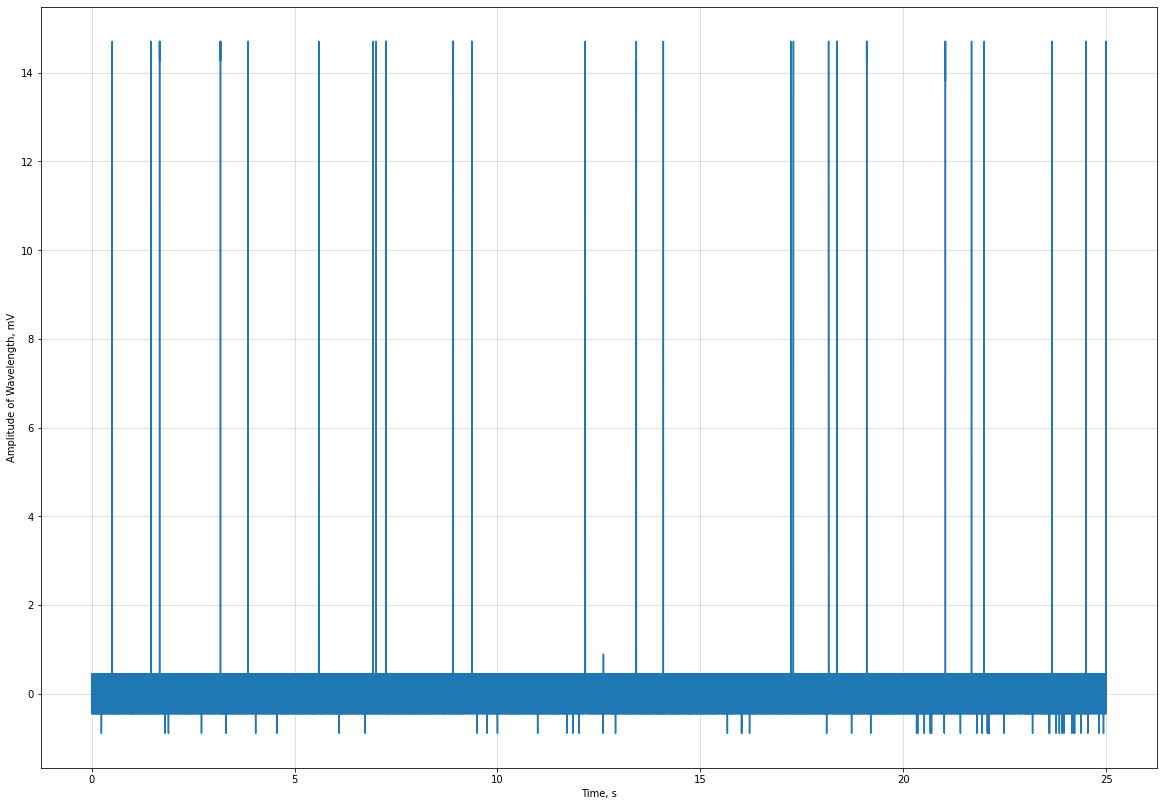

In [7]:
plt.figure(figsize = (20, 14))
plt.plot(frame[:25 * round(1 / delta_time) + 1]['Time'], frame[:25 * round(1 / delta_time) + 1]['Channel A'])
plt.xlabel("Time, s")
plt.ylabel("Amplitude of Wavelength, mV") 
plt.grid(alpha = 0.5)
plt.show()

In [8]:
wave_ = frame[:1 * round(1 / delta_time) + 1][frame[:1 * round(1 / delta_time) + 1]['Channel A'] > 2]

In [9]:
wave_.head(10)

,Time,Channel A
25285,0.50568,14.263
25286,0.50570,14.263
25287,0.50572,14.263
25288,0.50574,14.263
25289,0.50576,14.708
25290,0.50578,14.263
25291,0.50580,14.263
25292,0.50582,14.263
25293,0.50584,14.263
25294,0.50586,14.708


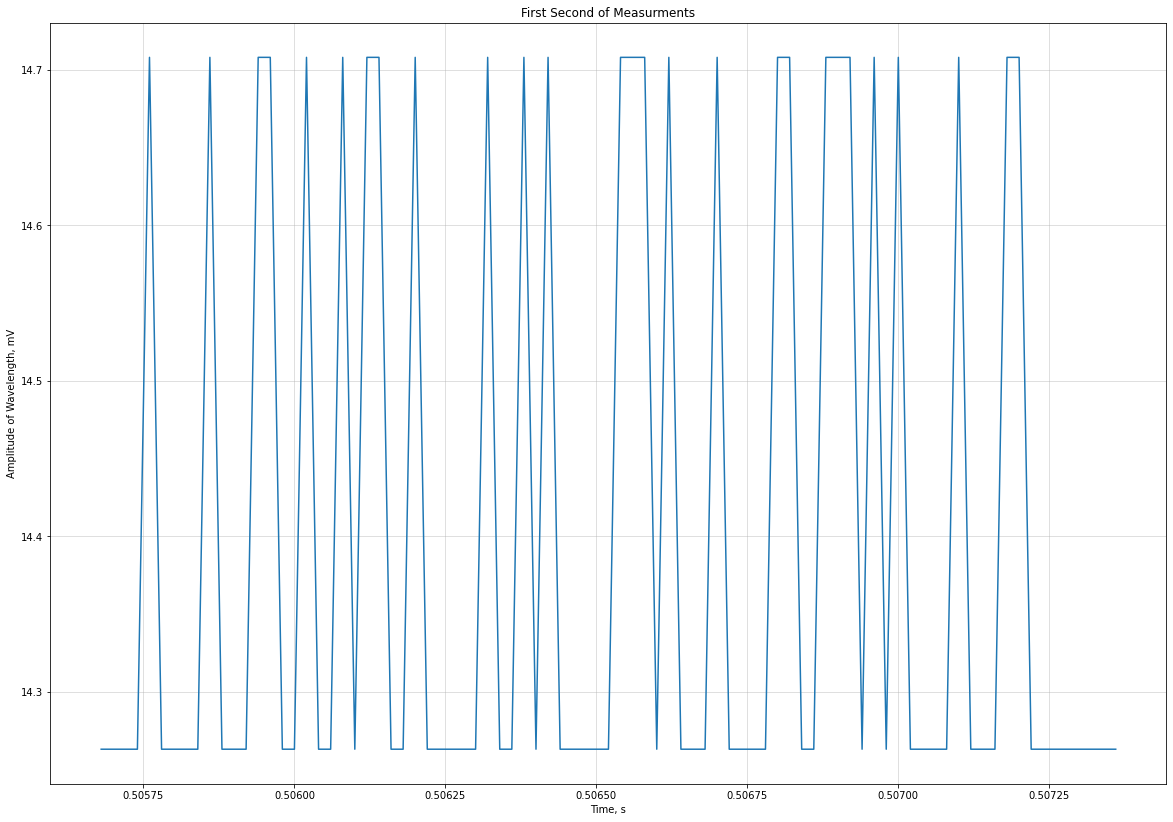

In [10]:
plt.figure(figsize = (20, 14))
plt.plot(wave_['Time'], wave_['Channel A'])
plt.xlabel("Time, s")
plt.ylabel("Amplitude of Wavelength, mV") 
plt.title("First Second of Measurments")
plt.grid(alpha = 0.5)
plt.show()

In [11]:
print(wave_[wave_ > 14.3].shape[0])

85


In [12]:
print(frame[7 * round(1 / delta_time) :  8 * round(1 / delta_time) + 1]['Channel A'][frame[7 * round(1 / delta_time) :  8 * round(1 / delta_time) + 1]['Channel A'] > 2].shape[0])
print(frame[8 * round(1 / delta_time) :  9 * round(1 / delta_time) + 1]['Channel A'][frame[8 * round(1 / delta_time) :  9 * round(1 / delta_time) + 1]['Channel A'] > 2].shape[0])
print(frame[9 * round(1 / delta_time) : 10 * round(1 / delta_time) + 1]['Channel A'][frame[9 * round(1 / delta_time) : 10 * round(1 / delta_time) + 1]['Channel A'] > 2].shape[0])

171
85
86


In [13]:
maximums = frame['Channel A'][frame['Channel A'] >= 14.3].shape[0]

In [14]:
maximums

2709

In [15]:
frame_2 = pd.read_csv("20_minutes_measures.csv")

/tmp/ipykernel_9066/553360307.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  frame_2 = pd.read_csv("20_minutes_measures.csv")


In [16]:
frame_2              = frame_2.iloc[1:]
time_zero_2          = float(frame_2['Time'][1])
chanel_zero_2        = float(frame_2['Channel A'][1])
frame_2['Time']      = pd.to_numeric(frame_2['Time'])
frame_2['Channel A'] = pd.to_numeric(frame_2['Channel A'])

/tmp/ipykernel_9066/3976572950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_2['Time']      = pd.to_numeric(frame_2['Time'])
/tmp/ipykernel_9066/3976572950.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_2['Channel A'] = pd.to_numeric(frame_2['Channel A'])


In [17]:
frame_2['Time']      = frame_2['Time']      - time_zero_2
frame_2['Channel A'] = frame_2['Channel A'] - chanel_zero_2
frame_2['Channel A'] = round(frame_2['Channel A'], 3)

In [18]:
delta_time_2 = frame_2['Time'][2] - frame_2['Time'][1]

In [19]:
print(delta_time_2)

1.9999999949504854e-05


Text(0, 0.5, 'Amplitude of Wavelength, mV')

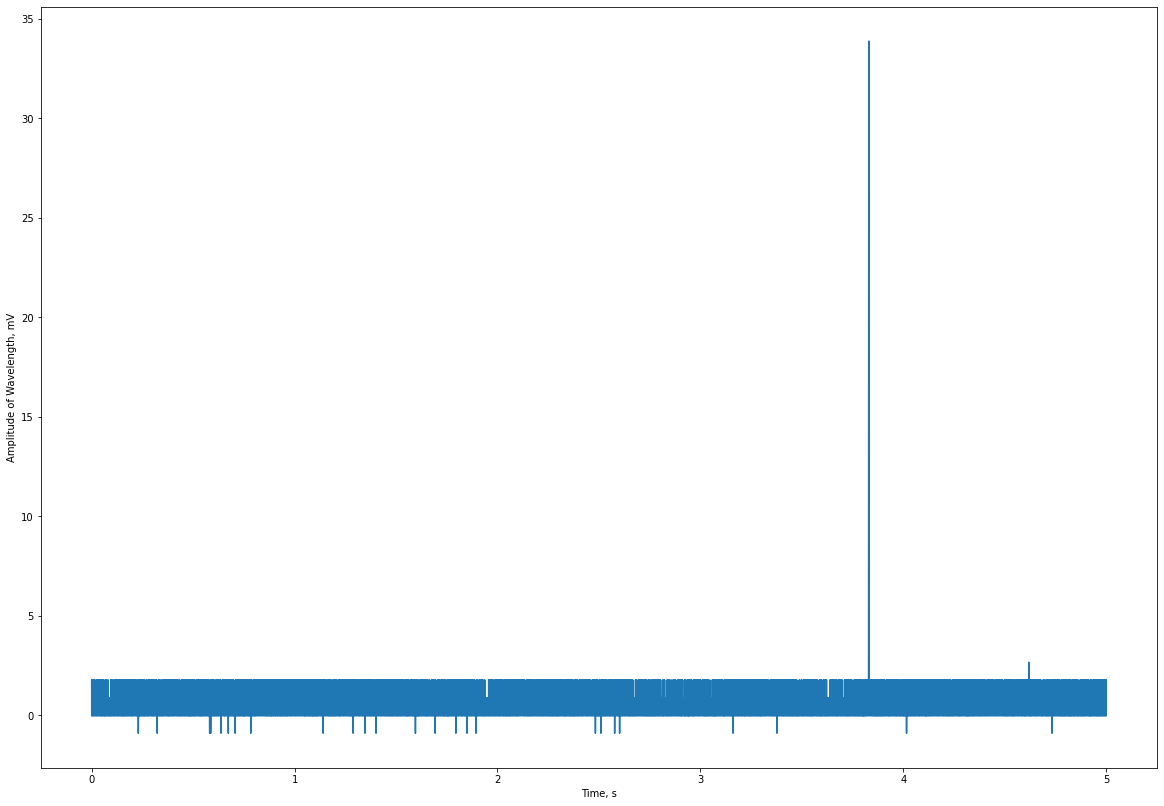

In [20]:
plt.figure(figsize = (20, 14))
plt.plot(frame_2[:5 * round(1 / delta_time_2) + 1]['Time'], frame_2[:5 * round(1 / delta_time_2) + 1]['Channel A'])
plt.xlabel("Time, s")
plt.ylabel("Amplitude of Wavelength, mV") 

In [21]:
wave_2 = frame_2[round(3 / delta_time_2) : round(4 / delta_time_2) + 1][frame_2[round(3 / delta_time_2) : round(4 / delta_time_2) + 1]['Channel A'] > 5]

In [22]:
wave_2.head(10)

,Time,Channel A
191445,3.82888,32.972
191446,3.82890,33.863
191447,3.82892,32.972
191448,3.82894,32.972
191449,3.82896,33.863
191450,3.82898,33.863
191451,3.82900,32.972
191452,3.82902,32.972
191453,3.82904,33.863
191454,3.82906,32.972


In [23]:
current_delta_of_mes_2 = round(1 / delta_time_2)
print(current_delta_of_mes_2)

50000


In [24]:
time_of_one_peak = abs(wave_2['Time'][191445] - wave_2['Time'][191451])
print(time_of_one_peak)

0.00012000000003808964


In [25]:
time__ = 3.82890

In [26]:
wave_3 = wave_2[wave_2['Channel A'] > 33]
wave_3['Time'] = round(wave_3['Time'] - time__, 5)

/tmp/ipykernel_9066/2092798694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wave_3['Time'] = round(wave_3['Time'] - time__, 5)


In [27]:
wave_3['Time'].sum() / time_of_one_peak

314.6666665667871

Text(0, 0.5, 'Amplitude of Wavelength, mV')

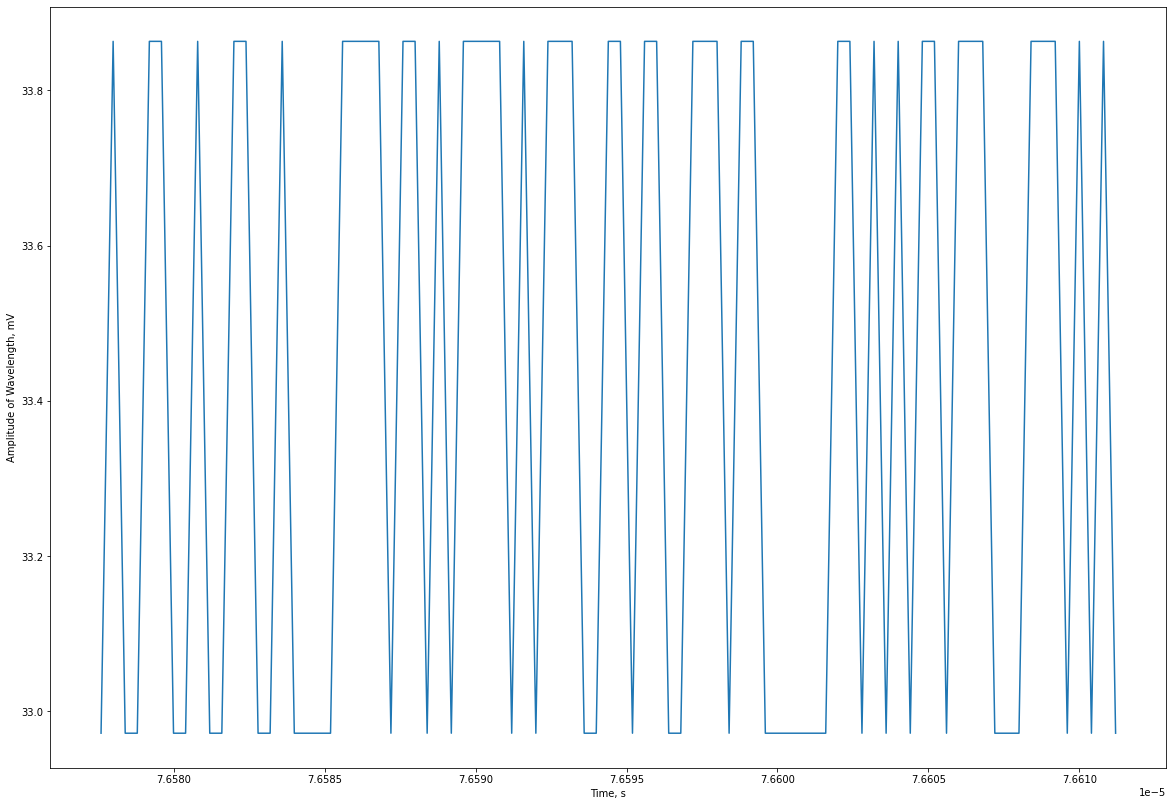

In [28]:
plt.figure(figsize = (20, 14))
plt.plot(wave_2['Time'] / current_delta_of_mes_2, wave_2['Channel A'])
plt.xlabel("Time, s")
plt.ylabel("Amplitude of Wavelength, mV") 

In [29]:
frame_2[:20 * round(1 / delta_time_2) + 1]['Channel A'][frame_2[:20 * round(1 / delta_time_2) + 1]['Channel A'] > 33].shape[0]

667

425 > 85 (5 times bigger)

In [41]:
current_delta_of_mes = round(1 / delta_time)
print(current_delta_of_mes)

50000


In [40]:
frame.shape[0] / current_delta_of_mes

1228.19078

In [32]:
hist_array = np.array([])

In [33]:
for i in range(round(frame.shape[0] / current_delta_of_mes)):
    Number_of_iters   = frame[i * round(1 / delta_time): (i + 1) * round(1 / delta_time) + 1]['Channel A'][frame[i * round(1 / delta_time): (i + 1) * round(1 / delta_time) + 1]['Channel A'] > 14.7].shape[0]
    hist_array = np.append(hist_array, float(Number_of_iters))

In [49]:
data = pd.Series(hist_array)
data = data[data > 2]
data.to_csv("Results.csv")
print(data.sum() / 10 / 60)

4.326666666666667


In [35]:
#data.value_counts()
None

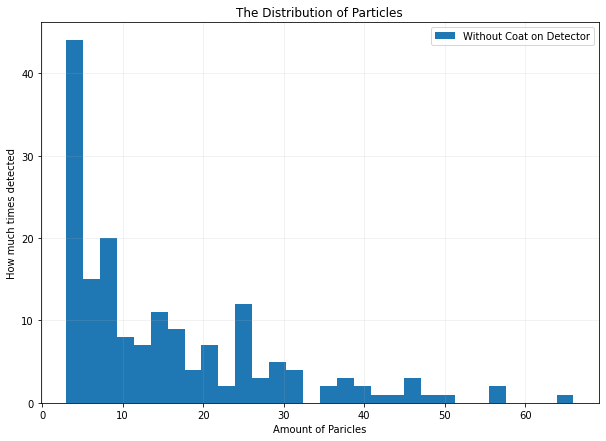

In [51]:
plt.figure(figsize=(10, 7))
plt.title("The Distribution of Particles")
plt.hist(data, bins = 30, label='Without Coat on Detector')
#plt.plot(arr1, arr2)
plt.grid(alpha = 0.2)
plt.xlabel("Amount of Paricles")
plt.ylabel("How much times detected")
plt.legend()
plt.show()

In [42]:
hist_array_2        = np.array([])

In [56]:
current_delta_of_mes_2 = round(1 / delta_time_2)
current_delta_of_mes_2 *= 20 
print(current_delta_of_mes_2)

1000000


In [57]:
for i in range(round(frame_2.shape[0] / current_delta_of_mes_2)):
    Number_of_iters   = frame_2[i * current_delta_of_mes_2: (i + 1) * current_delta_of_mes_2 + 1]['Channel A'][frame_2[i * current_delta_of_mes_2: (i + 1) * current_delta_of_mes_2 + 1]['Channel A'] > 33].shape[0]
    hist_array_2      = np.append(hist_array_2, float(Number_of_iters))

In [65]:
frame_2[(7) * current_delta_of_mes_2: (8) * current_delta_of_mes_2 + 1]['Channel A'][frame_2[(7) * current_delta_of_mes_2: (8) * current_delta_of_mes_2 + 1]['Channel A'] > 33].shape[0]

0

In [59]:
print(hist_array_2)

[667. 376.  58.   3.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 667. 376.  58.   3.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 667. 376.
  58.   3.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.]


In [60]:
data_2 = pd.Series(hist_array_2)
data_2 = data_2[data_2 > 200]

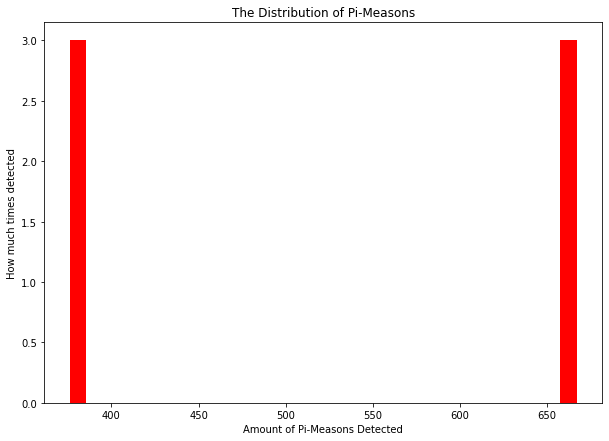

In [61]:
plt.figure(figsize=(10, 7))
plt.title("The Distribution of Pi-Measons")
plt.hist(data_2, bins = 30, color = 'r')
plt.xlabel("Amount of Pi-Measons Detected")
plt.ylabel("How much times detected")
plt.show()

In [12]:
machine_data = pd.read_csv("MachineData.csv")
machine_data.head()


,N,n(40),w,Pn
0,1,37,0.01,0.010
1,2,38,0.02,0.013
2,1,39,0.01,0.017
3,3,40,0.03,0.021
4,3,42,0.03,0.031


In [5]:
def puasson(mean, value):
    return (mean ** value) * np.exp(-mean) / factorial(value)

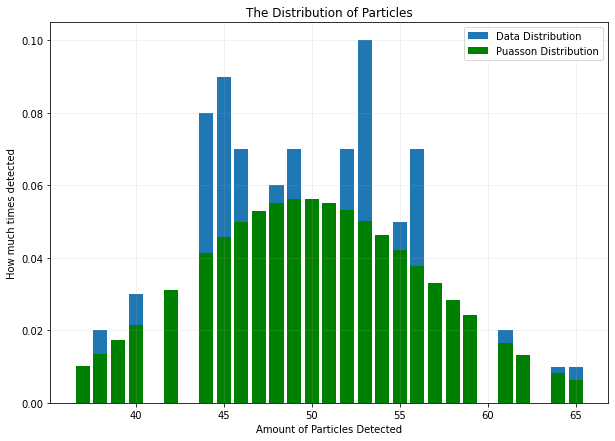

In [13]:

plt.figure(figsize=(10, 7))
plt.title("The Distribution of Particles")
plt.bar(machine_data['n(40)'], machine_data['w'], label = 'Data Distribution')
plt.bar(machine_data['n(40)'], puasson(50, machine_data['n(40)'].to_numpy().astype(float)), color = 'g', label = 'Puasson Distribution')
plt.grid(alpha = 0.2)
plt.xlabel("Amount of Particles Detected")
plt.ylabel("How much times detected")
plt.legend()
plt.show()

In [4]:
machine_data_2 = pd.read_csv("MachineData2.csv")
machine_data_2.head()

,ttt,tt,t
0,1,11,0.005
1,2,14,0.010
2,3,15,0.015
3,4,16,0.020
4,2,17,0.010


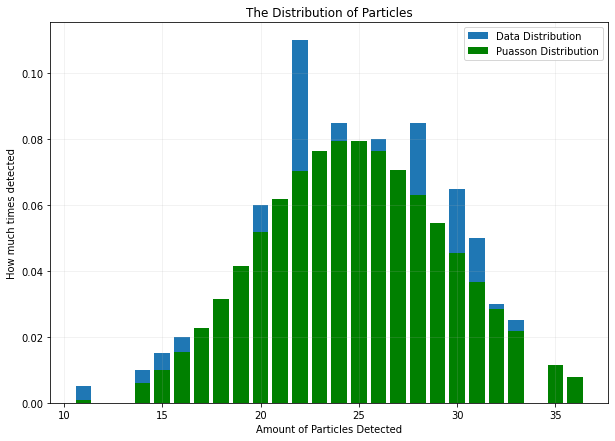

In [10]:
plt.figure(figsize=(10, 7))
plt.title("The Distribution of Particles")
plt.bar(machine_data_2['tt'], machine_data_2['t'], label = 'Data Distribution')
plt.bar(machine_data_2['tt'], puasson(25, machine_data_2['tt'].to_numpy().astype(float)), color = 'g', label = 'Puasson Distribution')
plt.grid(alpha = 0.2)
plt.xlabel("Amount of Particles Detected")
plt.ylabel("How much times detected")
plt.legend()
plt.show()